<a href="https://colab.research.google.com/github/surajjorwar/Mobile-price-prediction-/blob/main/Mobile_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

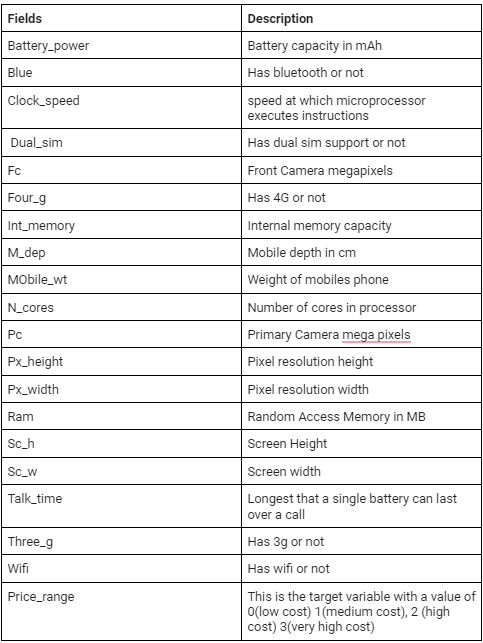

In [405]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Classification_Mobile_Price_Range_Prediction_f0084ac835.png')


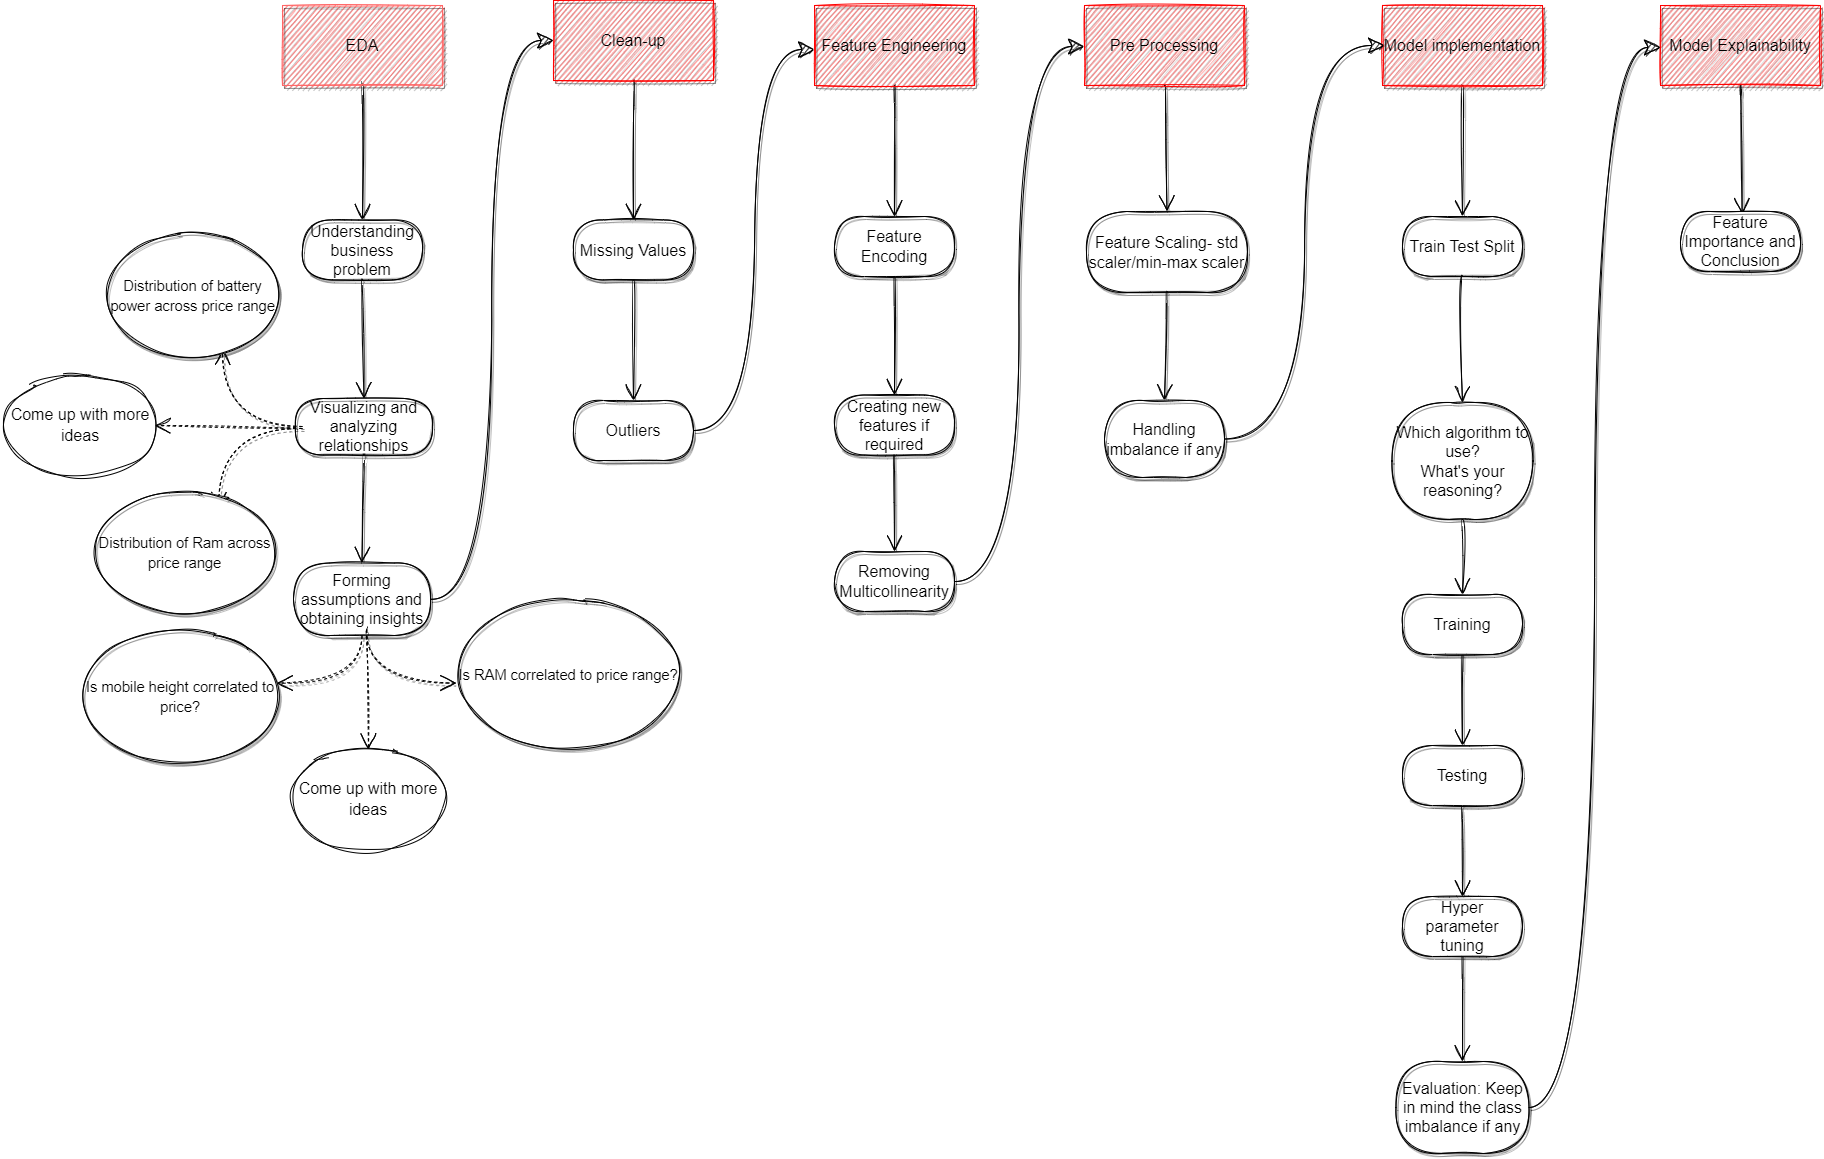

In [406]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/mobi_price_range_fe984c2b3a.png')

In [407]:
df = pd.read_csv('/content/drive/MyDrive/Mobile-price-prediction/data_mobile_price_range.csv')

In [408]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **1-EDA**

# VISUALIZING AND ANALYZING RELATIONSHIPS

## 1 - Distributon  of battery power accorss price range

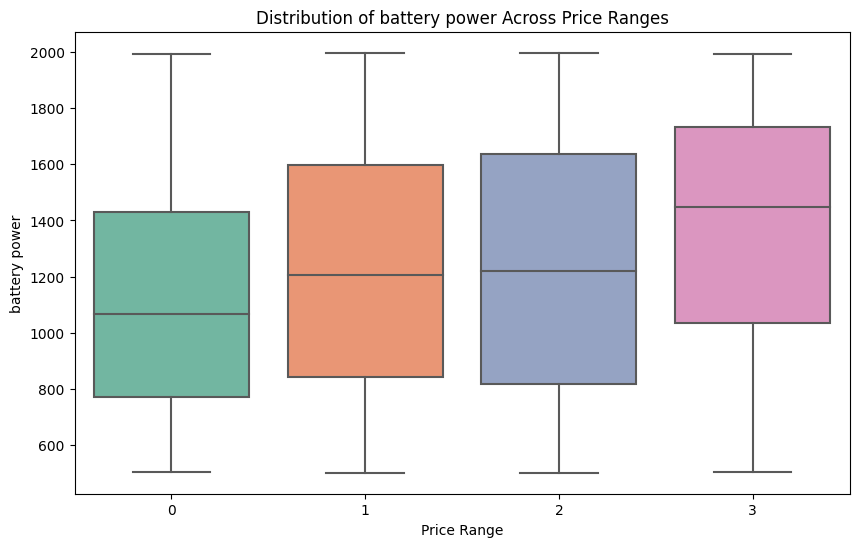

In [409]:
data = df
x = df['price_range']
y = df['battery_power']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of battery power Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("battery power")
plt.show()

their are no outliers in battery power

In [410]:
#checking unique values in  price_range
df['price_range'].unique()

array([1, 2, 3, 0])

In [411]:
#checking the distribution of data with price_range catogory
df.groupby('price_range')['price_range'].count()

price_range
0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [412]:
#taking mean value of battery_power W.R.T price range
PR_BP = df.groupby('price_range')['battery_power'].mean().reset_index()


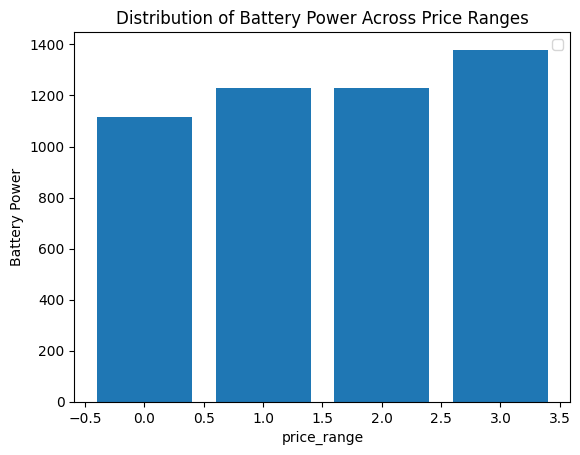

In [413]:
#visualizing  mean of battery power accross price rage
plt.bar(PR_BP['price_range'],PR_BP['battery_power'])
plt.xlabel('price_range')
plt.ylabel('Battery Power')
plt.title('Distribution of Battery Power Across Price Ranges')
plt.legend()

In [414]:
correlation_matrix = df.corr()
import numpy as np
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(df['battery_power'], df['price_range'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson Correlation Coefficient: 0.20072261211373096
p-value: 1.2648542392222364e-19


# **Visualizing the correlation between battery Power and price range **

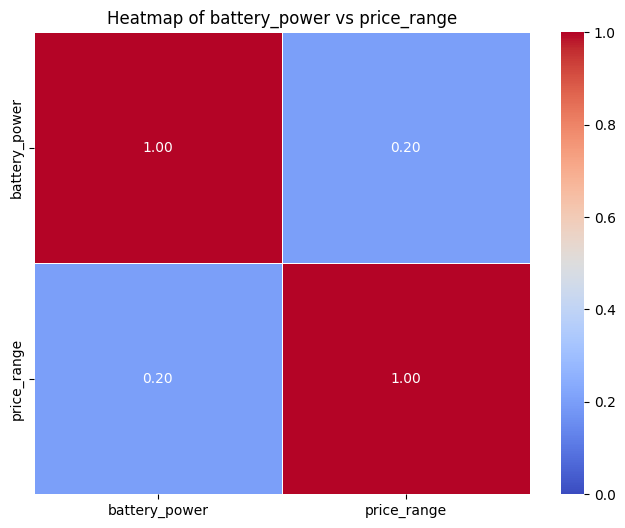

In [415]:
#plotting heat map
data = df[['battery_power','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of battery_power vs price_range")
plt.show()

## **These two variables shows weak positive relation  it is positive but its too weak to be considered **

##2 -Distribution of ram accross price range

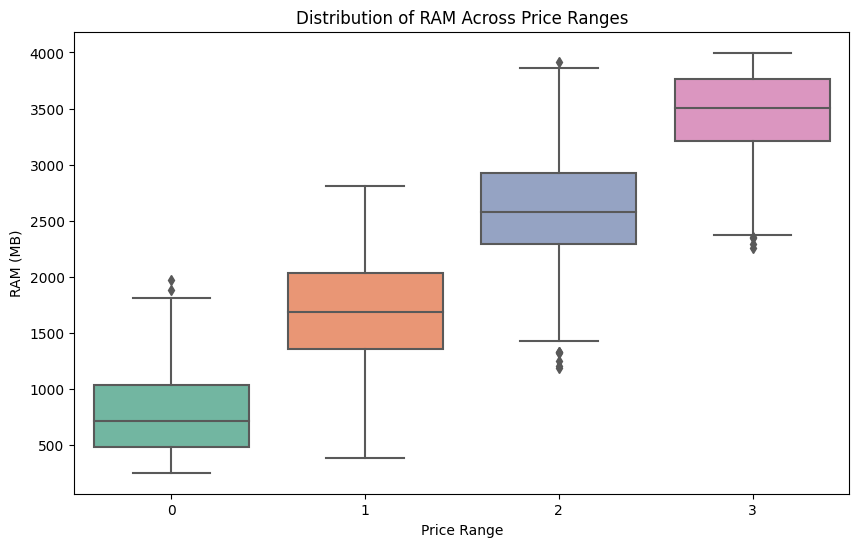

In [416]:
#Distribution of RAM Across Price Ranges
data = df
x = df['price_range']
y = df['ram']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of RAM Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.show()

# **we can clearly see the relation of ram and price range and also their are outliers in ram variable  **

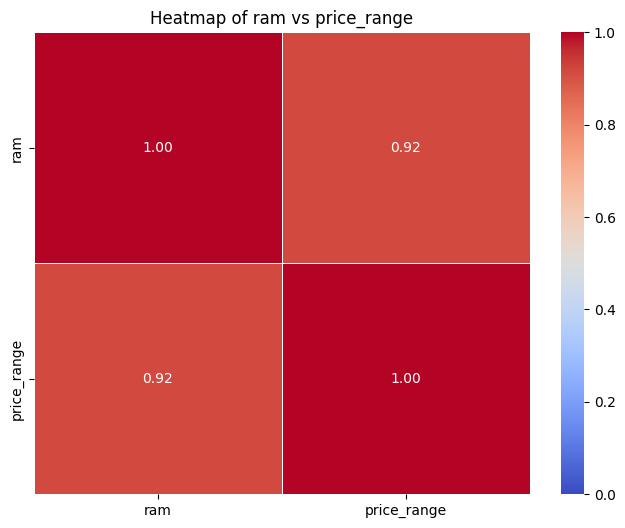

In [417]:
#plotting  Heatmap of ram vs price_range
data = df[['ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of ram vs price_range")
plt.show()

ram shows positive high correlation with price range it is one of the very important variable in this data set

## 3 - highly correlated  variables

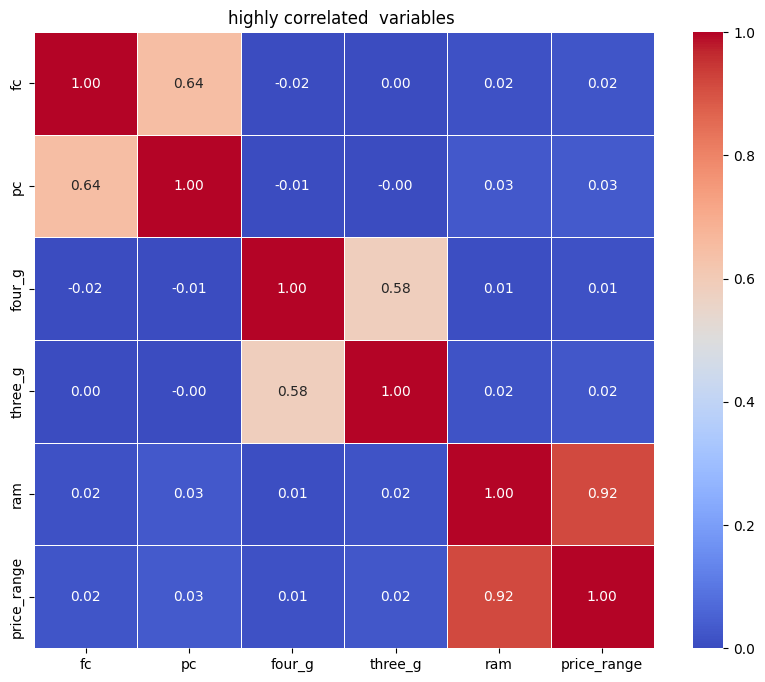

In [418]:
#plotting heat map for highly correlated  variables
data = df[['fc','pc','four_g','three_g','ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("highly correlated  variables ")
plt.show()

theese are the highly correlated variables
correlation of [fc---->pc = 0.64] ;correlation of [four_g---->three_g = 0.58] ;
correlation of [ram---->price_range = 0.92]



# **2- Clean-up**

In [419]:
#checking the null values in the dataframe
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking outliers with respect to price range **

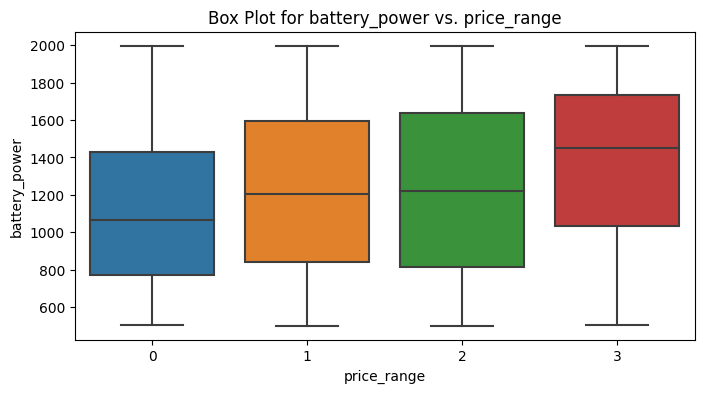

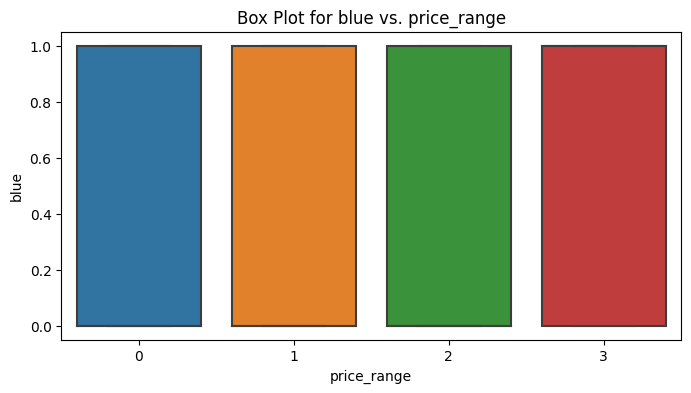

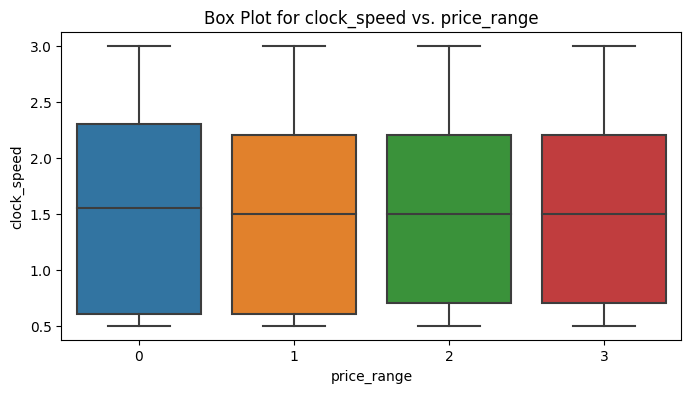

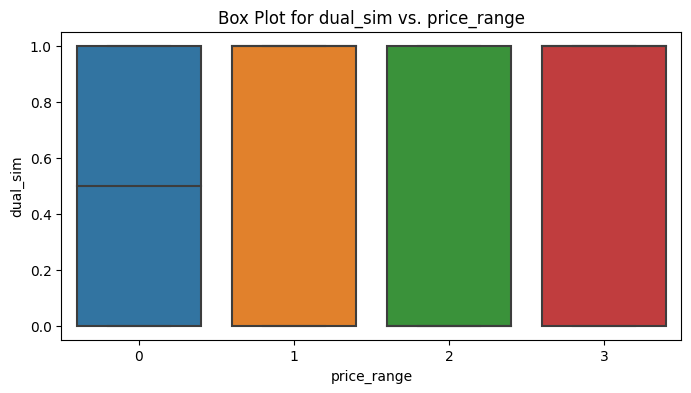

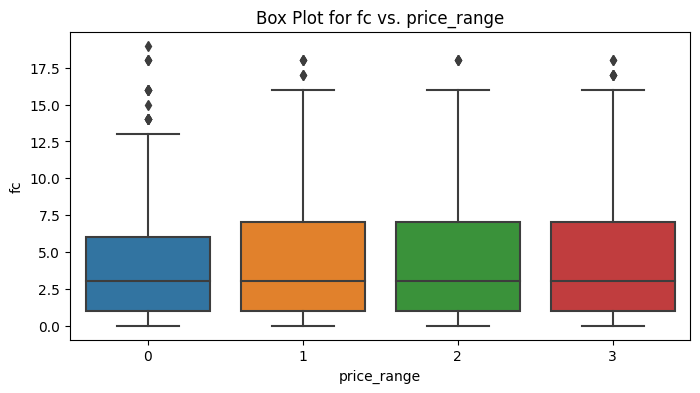

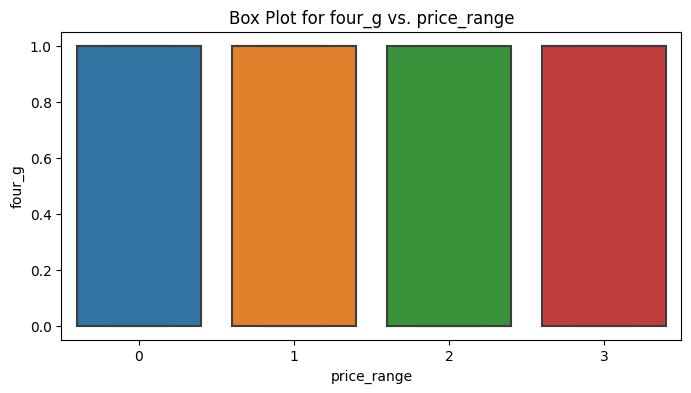

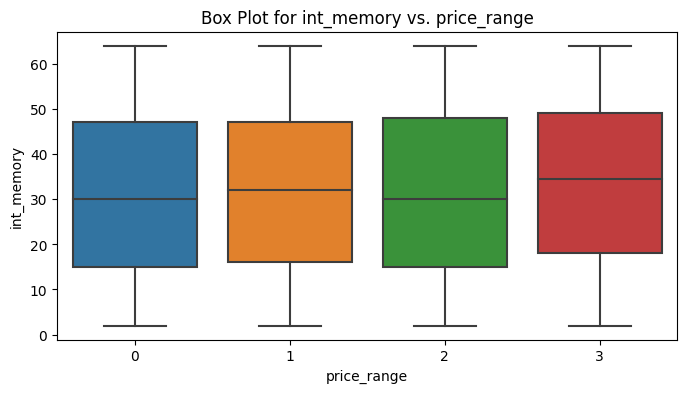

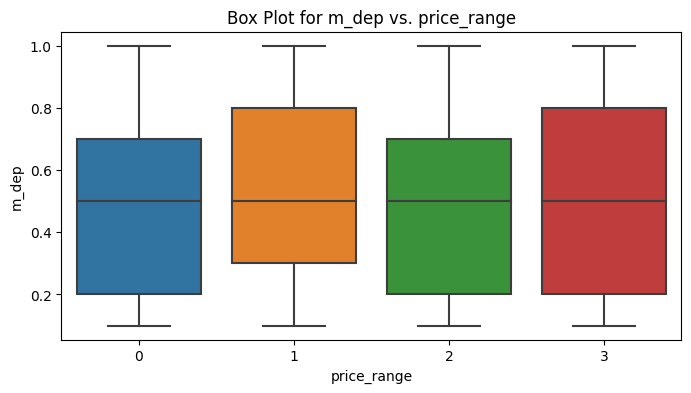

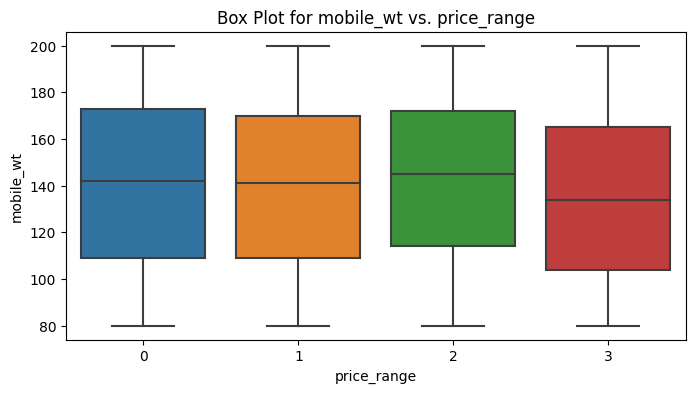

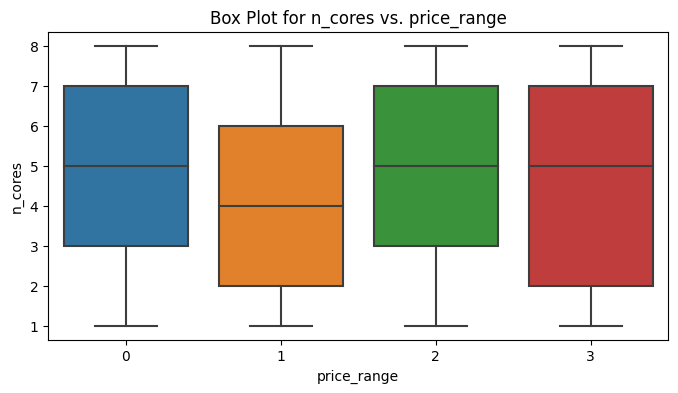

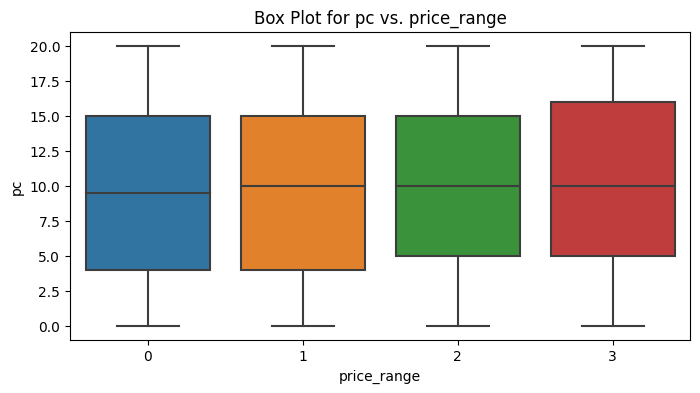

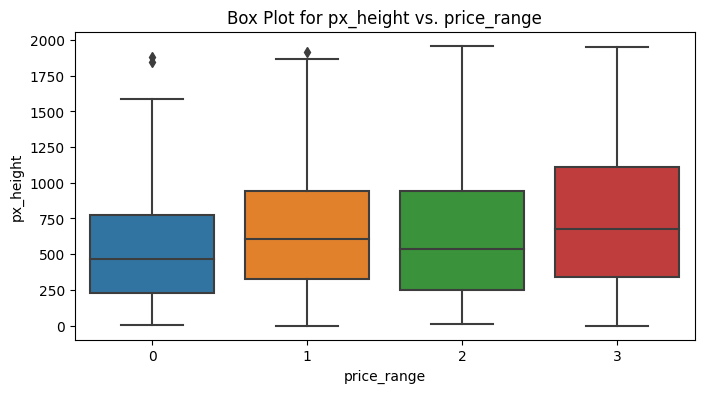

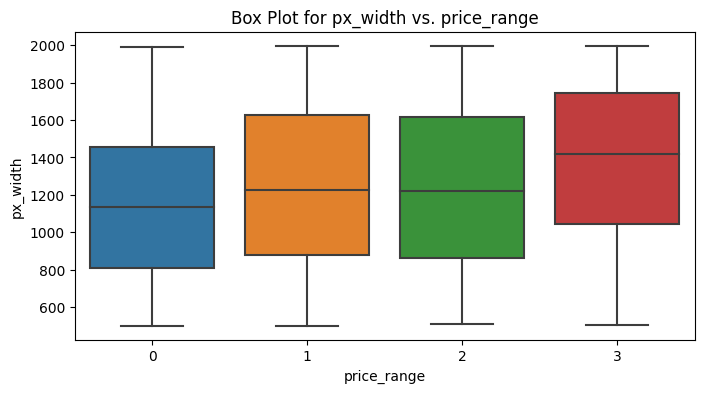

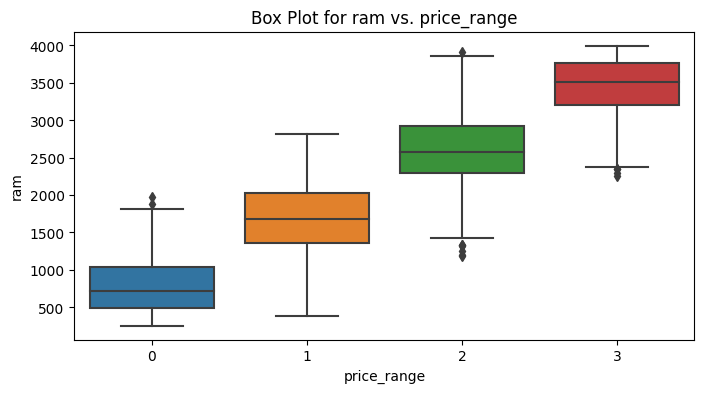

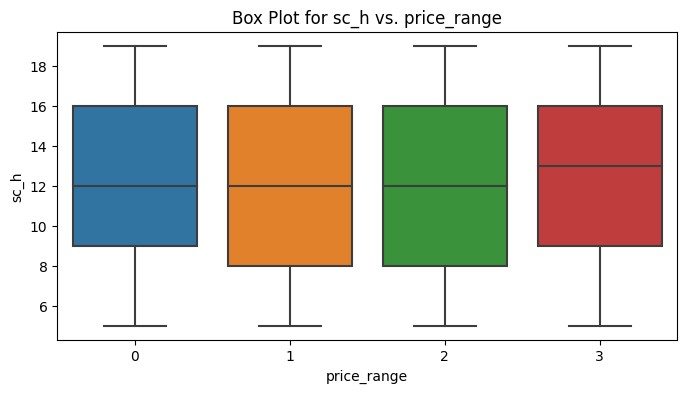

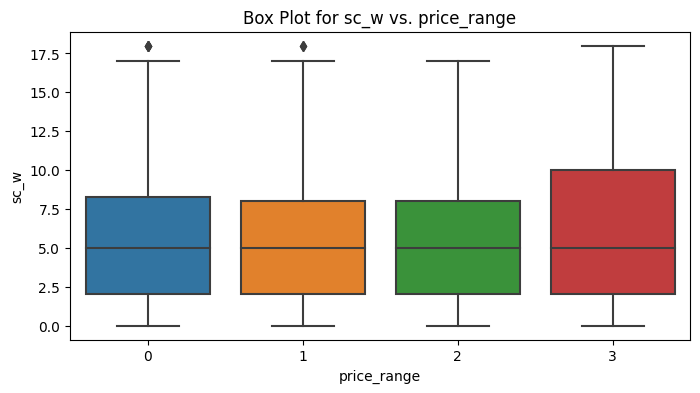

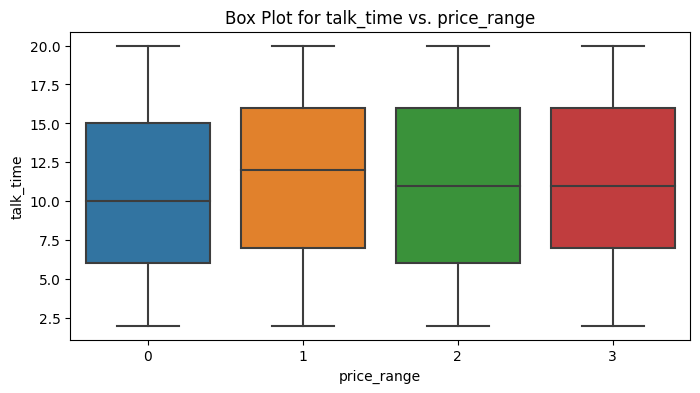

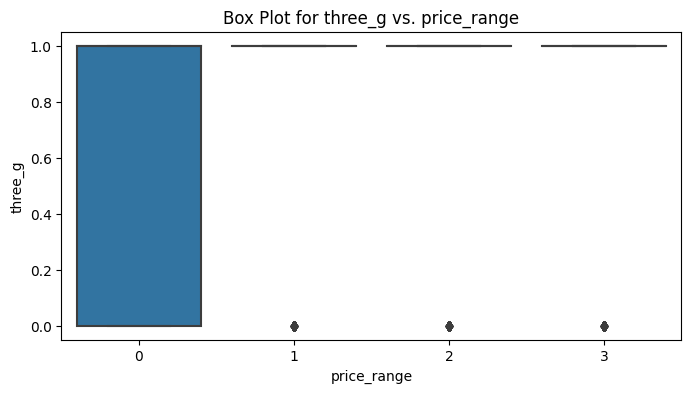

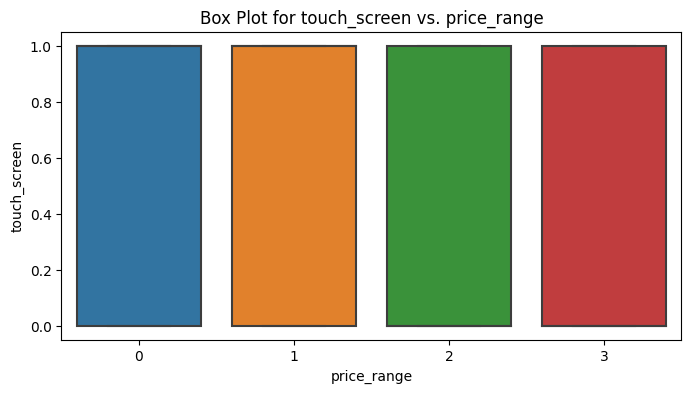

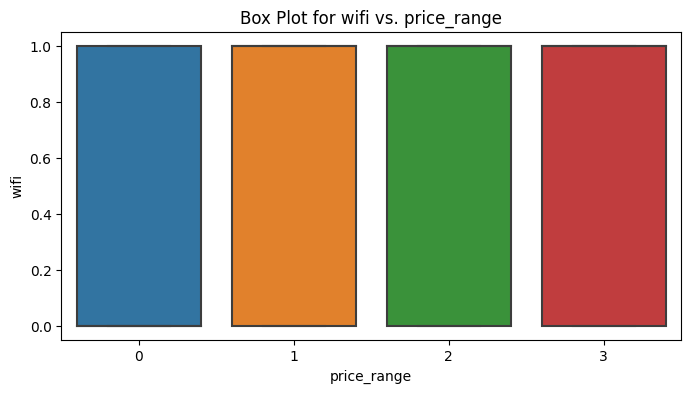

In [420]:
# Create box plots for each feature with respect to "price_range"
for column in df.columns:
    if column != "price_range":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="price_range", y=column, data=df)
        plt.title(f'Box Plot for {column} vs. price_range')
        plt.show()

## **their are outliers in fc ,px_height,ram,sc_w,three_g
three_g contains binary values  and not continous numerical values so outliers shown in three_g vs price_range using IQR methods are incorrect thats why we are not considering it as outliers **

## **Removing outliers  from these variables **

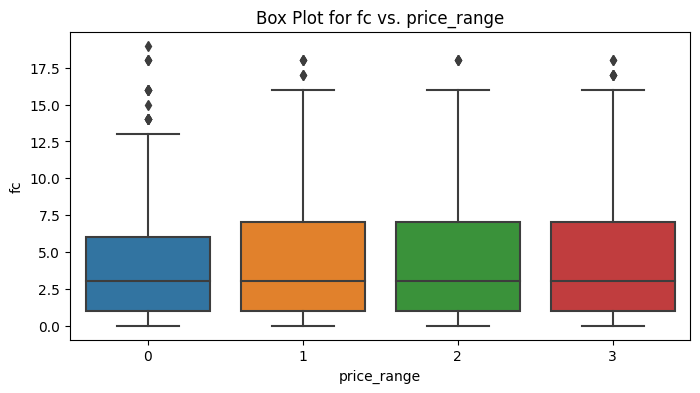

In [421]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="price_range", y="fc", data=df)
plt.title(f'Box Plot for fc vs. price_range')
plt.show()

In [422]:
#splitting data according to price_range categories  ct0 = price_range 0
data = df
ct0 = data[data['price_range']==0]
ct1 = data[data['price_range']==1]
ct2 = data[data['price_range']==2]
ct3 = data[data['price_range']==3]

#creating a function  to remove outliers
def remove_outliers(data):
  for colm in  ['ram','fc','px_height','sc_w']:
    q1= data[colm].quantile(0.25)
    q3= data[colm].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data =  data[(data[colm] >= lower_bound) & (data[colm] <= upper_bound)]
  return data

#removing outliers from 'ram','fc','px_height','sc_w' colimns

cleaned_ct0 = remove_outliers(ct0)
cleaned_ct1 = remove_outliers(ct1)
cleaned_ct2 = remove_outliers(ct2)
cleaned_ct3 = remove_outliers(ct3)
df= pd.concat([cleaned_ct0 , cleaned_ct1 , cleaned_ct2 , cleaned_ct3])
df.shape



(1950, 21)

## **3-Feature Engineering **

we are creating new column  resolution which is the product of px_height andpx_weight

In [423]:
df['resolution'] = df['px_height']* df['px_width']
#also removing px_height and px_weight
df.drop(columns = (['px_height','px_width']),inplace = True)

In [424]:
#checking if the shape of mobile is square or not
square = df[df['sc_h']==df['sc_w']]
square


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,resolution


In [425]:
df['screen_area'] = df['sc_h']*df['sc_w']
df.drop(columns = (['sc_h','sc_w']),inplace = True)

In [426]:
doo= df[(df['three_g']==1) & (df['four_g']==1)]
doo

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,resolution,screen_area
9,509,1,0.6,1,2,1,9,0.1,93,5,15,513,12,1,0,0,0,1391688,190
14,1866,0,0.5,0,13,1,52,0.7,185,1,17,373,3,1,0,1,0,200428,126
23,1602,1,2.8,1,4,1,38,0.7,114,3,20,1037,20,1,0,0,0,367208,56
44,1195,1,2.8,0,1,1,20,0.8,110,2,14,504,12,1,1,0,0,2610160,27
48,578,1,2.6,1,2,1,57,0.2,162,8,8,1270,5,1,0,1,0,1468825,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,727,1,2.5,1,0,1,64,0.2,193,1,9,3654,16,1,1,0,3,472104,9
1955,1515,1,2.1,1,4,1,24,0.9,176,5,6,3104,20,1,0,0,3,931509,30
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,3579,20,1,1,0,3,2972,152
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,1416576,9


In [430]:
df['3G'] = np.where((df['three_g'] == 1) & (df['four_g'] == 0), 1, 0)
df['2G'] = np.where((df['three_g'] == 0) & (df['four_g'] == 0), 1, 0)
df['dual'] = np.where((df['three_g'] == 1) & (df['four_g'] == 1), 1, 0)
df.drop(columns = (['three_g','four_g']),inplace = True)



In [431]:
df

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range,resolution,screen_area,3G,2G,dual
7,1954,0,0.5,1,0,24,0.8,187,4,0,700,5,1,1,0,588288,48,1,0,0
8,1445,1,0.5,0,0,53,0.7,174,7,14,1099,20,0,0,0,322696,17,1,0,0
9,509,1,0.6,1,2,9,0.1,93,5,15,513,12,0,0,0,1391688,190,0,0,1
14,1866,0,0.5,0,13,52,0.7,185,1,17,373,3,0,1,0,200428,126,0,0,1
15,775,0,1.0,0,3,46,0.7,159,2,16,568,11,1,1,0,1606768,255,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,44,0.8,113,8,19,3579,20,1,0,3,2972,152,0,0,1
1993,1467,1,0.5,0,0,18,0.6,122,5,0,3962,5,1,1,3,975912,165,1,0,0
1994,858,0,2.2,0,1,50,0.1,84,1,2,3978,3,1,0,3,747648,272,1,0,0
1997,1911,0,0.9,1,1,36,0.7,108,8,3,3057,5,1,0,3,1416576,9,0,0,1


In [432]:

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a synthetic dataset (replace this with your own dataset)
x=df.drop(columns = (['price_range']))
y=df['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth = 6,min_samples_leaf=2,random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.89
Confusion Matrix:
[[96  4  0  0]
 [ 3 82  9  0]
 [ 0 10 77 10]
 [ 0  0  8 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.85      0.87      0.86        94
           2       0.82      0.79      0.81        97
           3       0.90      0.92      0.91        99

    accuracy                           0.89       390
   macro avg       0.89      0.89      0.89       390
weighted avg       0.89      0.89      0.89       390



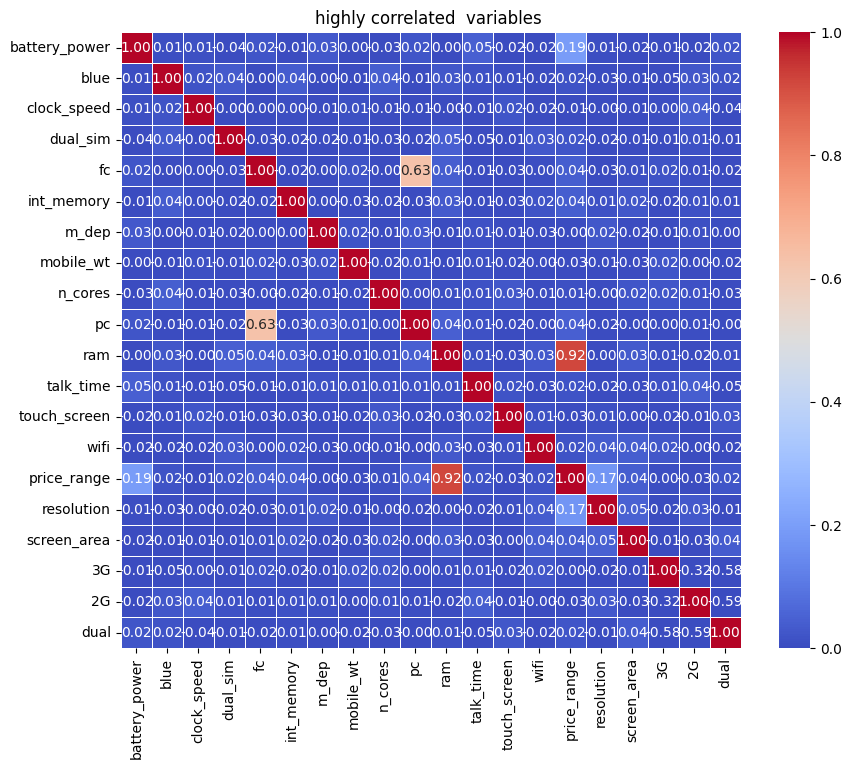

In [433]:
#plotting heat map for highly correlated  variables
data = df

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("highly correlated  variables ")
plt.show()

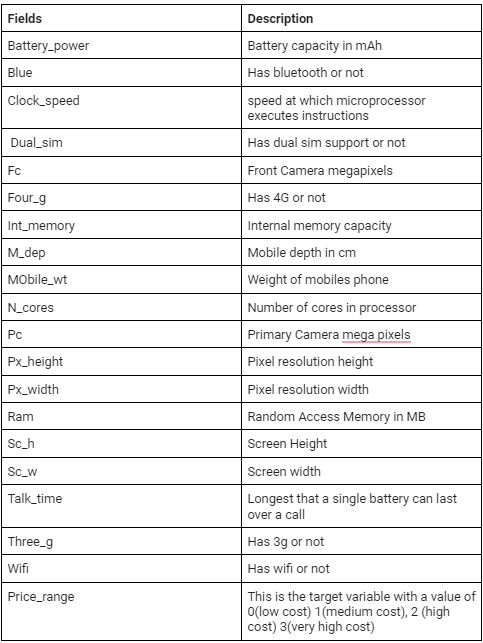

In [434]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Classification_Mobile_Price_Range_Prediction_f0084ac835.png')
